In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

data = load_iris()
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
X = data["data"].copy()
y = data["target"].copy()

stratSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in stratSplit.split(X, y):
    X_train = X[train_index]
    X_test = X[test_index]
    
    y_train = y[train_index]
    y_test = y[test_index]

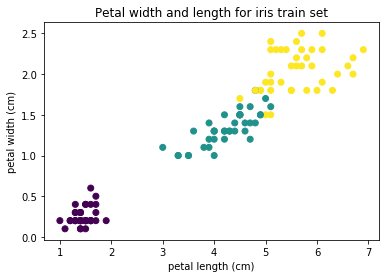

In [7]:
plt.scatter(X_train[:, 2], X_train[:, 3], c=y_train)
plt.xlabel(data["feature_names"][2])
plt.ylabel(data["feature_names"][3])
plt.title("Petal width and length for iris train set")
plt.savefig("irisSimpleScatter.png", bbox_inches="tight")
plt.show()

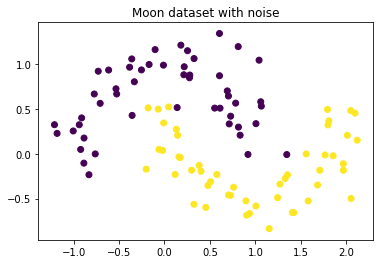

In [9]:
X_moon, y_moon = make_moons(noise=0.2, random_state=0)
X_moon_new = X_moon#np.append(X_moon,[[1.15,-0.1],[1.15,-0.3],[1.2,-0.5],[1.3,-0.8],[1.4,-1]]).reshape(-1,2)
y_moon_new = y_moon#np.append(y_moon,[0,0,0,0,0])
plt.scatter(X_moon_new[:,0], X_moon_new[:,1], c=y_moon_new)
plt.title("Moon dataset with noise")
plt.savefig("moonWithNoise.png", bbox_inches="tight")
plt.show()

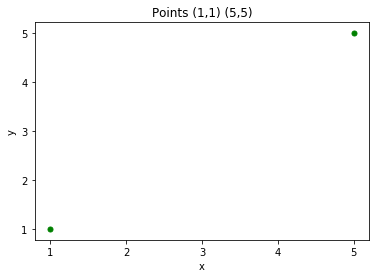

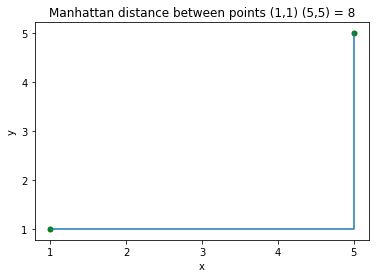

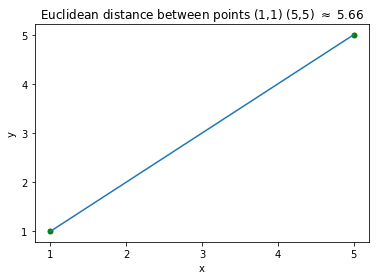

In [22]:
manhattanX = [1, 5, 5]
manhattanY = [1, 1, 5]
plt.scatter([1,5],[1,5],c="g",s=25)
plt.title("Points (1,1) (5,5)")
plt.xlabel("x")
plt.ylabel("y")
plt.xticks(range(1,6),range(1,6))
plt.yticks(range(1,6),range(1,6))
plt.savefig("twoPoints.png",bbox_inches="tight")
plt.show()
plt.scatter([1,5],[1,5],c="g",s=25)
plt.plot(manhattanX,manhattanY)
plt.title("Manhattan distance between points (1,1) (5,5) = 8")
plt.xlabel("x")
plt.ylabel("y")
plt.xticks(range(1,6),range(1,6))
plt.yticks(range(1,6),range(1,6))
plt.savefig("manhattanDistance.png",bbox_inches="tight")
plt.show()
plt.scatter([1,5],[1,5],c="g",s=25)
plt.plot([1,5],[1,5])
plt.title(r"Euclidean distance between points (1,1) (5,5) $\approx$ 5.66")
plt.xlabel("x")
plt.ylabel("y")
plt.xticks(range(1,6),range(1,6))
plt.yticks(range(1,6),range(1,6))
plt.savefig("euclideanDistance.png",bbox_inches="tight")
plt.show()

In [21]:
np.sqrt((5-1)**2+(5-1)**2)

5.656854249492381

In [74]:
def plotDecisionBoundary(svc, X, y, X_train, y_train, title, savename,p=None):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    xx_r = xx.ravel()
    yy_r = yy.ravel()
    Z = svc.predict(np.c_[xx_r, yy_r])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
    plt.scatter(X[:, 0],X[:, 1],c=y, cmap=plt.cm.cool)
    plt.xticks([-2,-1,0,1,2],[-2,-1,0,1,2])
    plt.yticks([-1,0,1,2],[-1,0,1,2])
    plt.title(title)
    plt.show()
#     if p is not None:
#         savename += savename.split(".png")[0]+f"p{p}.png"
#     plt.savefig(savename,bbox_inches="tight")
    
for train_index, test_index in stratSplit.split(X_moon, y_moon):
    X_train_m = X_moon[train_index]
    X_test_m = X_moon[test_index]
    
    y_train_m = y_moon[train_index]
    y_test_m = y_moon[test_index]

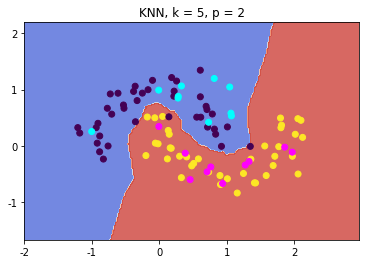

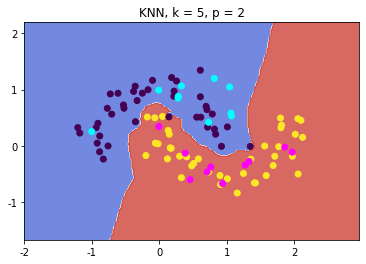

In [76]:
from sklearn.neighbors import KNeighborsClassifier
k = 5
p = 2
#p defines the distance metric to use for determining the nearest neighbors 
# (e.g. what K neighbors are closest, with closest being assesed by the distance metric defined through p)
# weight defines the weighting scheme to use for neighbor influence
knn_clf = KNeighborsClassifier(n_neighbors=k, weights="uniform")
knn_clf.fit(X_train_m, y_train_m)
plotDecisionBoundary(knn_clf, X_test_m, y_test_m, X_train_m, 
                     y_train_m,title=f"KNN, k = {k}, p = {p}",savename=f"knn{k}Moons.png",p=p)

knn_clf = KNeighborsClassifier(n_neighbors=k, weights="distance", p=2)
knn_clf.fit(X_train_m, y_train_m)
plotDecisionBoundary(knn_clf, X_test_m, y_test_m, X_train_m, 
                     y_train_m,title=f"KNN, k = {k}, p = {p}",savename=f"knn{k}Moons.png",p=p)